# Combined Data

In [20]:
# 3rd Party Imports
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Import Crime Data
crime = pd.read_csv("cleaned_csv/crime_cleaned.csv")
crime = gpd.GeoDataFrame(crime, geometry=gpd.GeoSeries.from_wkt(crime['geometry']), crs="EPSG:4326")
crime.head()

,NEIGHBOURHOOD,POPULATION,geometry,ASSAULT,ASSAULT_NORM,AUTOTHEFT,AUTOTHEFT_NORM,BIKETHEFT,BIKETHEFT_NORM,BREAKENTER,...,HOMICIDE,HOMICIDE_NORM,ROBBERY,ROBBERY_NORM,SHOOTING,SHOOTING_NORM,THEFT_MV,THEFT_MV_NORM,THEFT_OV,THEFT_OV_NORM
0,South Eglinton-Davisville,21987,"POLYGON ((-79.38635 43.69784, -79.38623 43.697...",257.806720,0.011725,30.665895,0.001395,104.975584,0.004774,130.266611,...,1.197520,0.000054,32.034761,0.001457,1.820015,0.000083,76.243084,0.003468,11.917225,0.000542
1,North Toronto,15077,"POLYGON ((-79.39744 43.70694, -79.39837 43.706...",312.227180,0.020709,28.839955,0.001913,77.893082,0.005166,171.983067,...,0.843186,0.000056,40.480436,0.002685,0.799834,0.000053,75.922334,0.005036,15.778356,0.001047
2,Dovercourt Village,13837,"POLYGON ((-79.43412 43.66015, -79.43537 43.659...",353.172389,0.025524,61.799989,0.004466,135.222384,0.009773,171.290513,...,2.072072,0.000150,86.070851,0.006220,2.082016,0.000150,187.256442,0.013533,14.555833,0.001052
3,Junction-Wallace Emerson,26240,"POLYGON ((-79.4387 43.66767, -79.43841 43.6669...",422.010159,0.016083,68.775774,0.002621,127.214314,0.004848,172.364532,...,1.542461,0.000059,57.355054,0.002186,6.464922,0.000246,200.356534,0.007636,16.701560,0.000636
4,Yonge-Bay Corridor,14731,"POLYGON ((-79.38404 43.64497, -79.38502 43.644...",2218.028369,0.150569,103.680670,0.007038,930.550018,0.063170,479.260519,...,4.064631,0.000276,298.961034,0.020295,8.989731,0.000610,475.313570,0.032266,176.995572,0.012015


In [22]:
# Drop Unnecessary Columns and Merge Columns
crime = crime[[
    "NEIGHBOURHOOD", "geometry", 
    "ASSAULT_NORM", "AUTOTHEFT_NORM", "BIKETHEFT_NORM", 
    "BREAKENTER_NORM", "HOMICIDE_NORM", "ROBBERY_NORM", 
    "SHOOTING_NORM", "THEFT_MV_NORM", "THEFT_OV_NORM"
]]

# Import PCA Modules
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize Data
norm_columns = [
    "ASSAULT_NORM", "AUTOTHEFT_NORM", "BIKETHEFT_NORM", 
    "BREAKENTER_NORM", "HOMICIDE_NORM", "ROBBERY_NORM", 
    "SHOOTING_NORM", "THEFT_MV_NORM", "THEFT_OV_NORM"
]
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime[norm_columns])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components
crime_pca = pca.fit_transform(crime_scaled)

# Add PCA Components
crime["CRIME_PCA1"] = crime_pca[:, 0]
crime["CRIME_PCA2"] = crime_pca[:, 1]

# Remove Unnecessary Columns
crime = crime[["NEIGHBOURHOOD", "geometry", "CRIME_PCA1", "CRIME_PCA2"]]

# Display DataFrame
crime.head()

,NEIGHBOURHOOD,geometry,CRIME_PCA1,CRIME_PCA2
0,South Eglinton-Davisville,"POLYGON ((-79.38635 43.69784, -79.38623 43.697...",-1.731648,0.938107
1,North Toronto,"POLYGON ((-79.39744 43.70694, -79.39837 43.706...",-0.834587,1.174722
2,Dovercourt Village,"POLYGON ((-79.43412 43.66015, -79.43537 43.659...",0.770879,0.658997
3,Junction-Wallace Emerson,"POLYGON ((-79.4387 43.66767, -79.43841 43.6669...",-1.155935,0.656557
4,Yonge-Bay Corridor,"POLYGON ((-79.38404 43.64497, -79.38502 43.644...",12.658816,3.150968


In [23]:
# Import Parks Data
parks = pd.read_csv("cleaned_csv/parks_cleaned.csv")
parks = gpd.GeoDataFrame(parks, geometry=gpd.GeoSeries.from_wkt(parks['geometry']), crs="EPSG:32633")
parks.head()

,ASSET_NAME,geometry,TYPE,AREA
0,120 QUEENS QUAY E PARK,"POLYGON ((-5312216.594 10505968.312, -5312122....",Park,0.002330
1,167 ARMOUR BLVD PARKETTE,"POLYGON ((-5295684.01 10511379.406, -5295685.3...",Park,0.001800
2,174 SOUDAN AVE PARK,"POLYGON ((-5302106.639 10507533.959, -5302103....",Park,0.000464
3,175 THE POND RD PARK,"POLYGON ((-5290633.045 10519542.664, -5290648....",Park,0.025816
4,20 CASTLEFIELD AVE PARK,"POLYGON ((-5301047.005 10508386.441, -5301066....",Park,0.007734


In [24]:
# Import Subway Data
subway = pd.read_csv("cleaned_csv/ttc_cleaned.csv")
subway = gpd.GeoDataFrame(subway, geometry=gpd.GeoSeries.from_wkt(subway['geometry']), crs="EPSG:4326")
subway.head()

,ROUTE_NAME,RID,geometry
0,LINE 1 (YONGE-UNIVERSITY),1,"LINESTRING (-79.52813 43.79677, -79.52689 43.7..."
1,LINE 2 (BLOOR - DANFORTH),2,"LINESTRING (-79.5354 43.63781, -79.53386 43.63..."
2,LINE 3 (SCARBOROUGH),3,"LINESTRING (-79.26332 43.73266, -79.26332 43.7..."
3,LINE 4 (SHEPPARD),4,"LINESTRING (-79.41113 43.76145, -79.40981 43.7..."


In [28]:
# Import Schools
from shapely.geometry import Point

schools = pd.read_csv("cleaned_csv/Combined_schools_with_coords.csv")
schools['geometry'] = schools.apply(lambda row: Point(row['long'], row['lat']), axis=1)
schools = gpd.GeoDataFrame(schools, geometry='geometry')
schools = schools[~schools.geometry.is_empty]
schools.drop(columns=["lat", "long"], inplace=True)
schools.set_crs("EPSG:4326", inplace=True)
schools.head()

,School Name,EQAO % at Levels 3/4,OSSLT % Successful,Fraiser Score,geometry
0,A Y Jackson Secondary School,93.0,88.0,7.9,POINT (-79.367 43.80472)
1,Agincourt Collegiate Institute,73.0,94.0,8.3,POINT (-79.27847 43.78907)
2,Albert Campbell Collegiate Institute,63.0,88.0,7.0,POINT (-79.27336 43.81)
3,Birchmount Park Collegiate Institute,32.0,79.0,5.2,POINT (-79.2596 43.69785)
5,C W Jefferys Collegiate Institute,19.0,72.0,3.9,POINT (-79.50065 43.75831)


In [ ]:
def merge_dataframes(real_estate_gdf, parks_gdf, subways_gdf, schools_gdf, crime_gdf, census_gdf):
    """
    Merge real estate data with proximity information to parks, subways, and schools,
    including details about the nearest school's performance and neighborhood crime data.

    Parameters:
        real_estate_gdf (gpd.GeoDataFrame): DataFrame of real estate data.
        parks_gdf (gpd.GeoDataFrame): GeoDataFrame of parks with polygon geometry.
        subways_gdf (gpd.GeoDataFrame): GeoDataFrame of subways with polygon geometry.
        schools_gdf (gpd.GeoDataFrame): GeoDataFrame of schools with polygon geometry and performance data.
        crime_gdf (gpd.GeoDataFrame): GeoDataFrame of crime data with polygon geometry and crime rates.
        census_gdf (gpd.GeoDataFrame): GeoDataFrame of census data with neighborhood information.

    Returns:
        gpd.GeoDataFrame: Merged GeoDataFrame with real estate data and data about nearby social infrastructure.
    """
    # Ensure all GeoDataFrames have the same CRS
    target_crs = "EPSG:32633"  # Example CRS in meters, suitable for buffers
    geo_dfs = [real_estate_gdf, parks_gdf, subways_gdf, schools_gdf, crime_gdf, census_gdf]
    geo_dfs = [gdf.to_crs(target_crs) for gdf in geo_dfs]
    real_estate_gdf, parks_gdf, subways_gdf, schools_gdf, crime_gdf, census_gdf = geo_dfs

    # Find nearest subway and record distance
    real_estate_gdf = gpd.sjoin_nearest(real_estate_gdf, subways_gdf, how="left", distance_col="distance_to_subway")
    real_estate_gdf = real_estate_gdf.rename(columns={"index_right": "subway_index"})

    # Find nearest school and include school information
    real_estate_gdf = gpd.sjoin_nearest(real_estate_gdf, schools_gdf, how="left", distance_col="distance_to_school")
    real_estate_gdf = real_estate_gdf.rename(columns={"index_right": "schools_index"})

    # Calculate total area of parks within an 800m radius
    buffer_distance = 800  # in meters
    real_estate_gdf["buffer"] = real_estate_gdf.geometry.buffer(buffer_distance)
    
    # Spatial join for parks within the buffer
    parks_within_buffer = gpd.sjoin(parks_gdf, real_estate_gdf.set_geometry("buffer"), how="inner", predicate="intersects")
    total_area_per_real_estate = parks_within_buffer.groupby(parks_within_buffer.index)["AREA"].sum()
    
    # Add park area data
    real_estate_gdf["total_area_within_800m"] = real_estate_gdf.index.map(total_area_per_real_estate).fillna(0)

    # Find neighborhood data from census data
    real_estate_gdf = gpd.sjoin(real_estate_gdf, census_gdf[['AREA_NA7', 'geometry']], how="left", predicate="within")
    real_estate_gdf['Neighbourhood'] = real_estate_gdf['AREA_NA7'].fillna('Outside City')
    real_estate_gdf = real_estate_gdf[real_estate_gdf['Neighbourhood'] != 'Outside City']
    real_estate_gdf = real_estate_gdf.rename(columns={"index_right": "hood_index"})

    # Find nearest school and include school information
    real_estate_gdf = gpd.sjoin(real_estate_gdf, crime_gdf, how="left", predicate="within")
    real_estate_gdf = real_estate_gdf.rename(columns={"index_right": "crime_index"})

    # Clean up unnecessary columns
    columns_to_drop = ['Unnamed: 0_left', 'geometry_right', 'AREA_NA7', 'buffer']
    real_estate_gdf = real_estate_gdf.drop(columns=[col for col in columns_to_drop if col in real_estate_gdf.columns])

    return real_estate_gdf

# Call the function with your data
combined_gdf = merge_dataframes(real_estate, parks, subway, schools, crime, census)
combined_gdf


,link,Listed Price,Sold Price,Type,address,latitude_left,longitude_left,geometry,price,mls,...,HOMICIDE,HOMICIDE_NORM,ROBBERY,ROBBERY_NORM,SHOOTING,SHOOTING_NORM,THEFT_MV,THEFT_MV_NORM,THEFT_OV,THEFT_OV_NORM
1,/on/etobicoke-real-estate/508-40-richview-rd/h...,"$729,888","$680,000",Condo Apt,"508 - 40 Richview Rd , Etobicoke - Humber Heights",43.685146,-79.515954,POINT (-5303780.986 10522212.051),NaN,NaN,...,4.115806,0.000361,31.591682,0.002772,18.021528,0.001581,160.440471,0.014076,15.435989,0.001354
3,/on/etobicoke-real-estate/24-wallis-cres/home/...,"$874,999","$815,000",Detached,"24 Wallis Cres , Etobicoke - Mount Olive-Silve...",43.754292,-79.592347,POINT (-5291789.819 10529750.132),NaN,NaN,...,4.273275,0.000121,130.173439,0.003679,22.313521,0.000631,177.128464,0.005006,12.776042,0.000361
7,/on/toronto-real-estate/2611-8-eglinton-ave-e/...,"$659,800","$650,000",Condo Apt,"2611 - 8 Eglinton Ave E , Toronto - Mount Plea...",43.707208,-79.397783,POINT (-5301806.273 10508190.369),NaN,NaN,...,0.843186,0.000056,40.480436,0.002685,0.799834,0.000053,75.922334,0.005036,15.778356,0.001047
9,/on/etobicoke-real-estate/405-35-fontenay-crt/...,"$590,888","$588,000",Condo Apt,"405 - 35 Fontenay Crt , Etobicoke - Edenbridge...",43.682819,-79.510925,POINT (-5304216.948 10521674.157),NaN,NaN,...,0.000000,0.000000,19.318997,0.001119,3.875281,0.000224,154.629526,0.008953,15.972822,0.000925
10,/on/toronto-real-estate/12-51-florence-st/home...,"$699,000","$740,000",Condo Townhouse,"12 - 51 Florence St , Toronto - Little Portugal",43.645419,-79.431792,POINT (-5311194.937 10513210.106),NaN,NaN,...,1.885461,0.000108,39.222556,0.002254,1.768727,0.000102,123.992692,0.007126,20.843952,0.001198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,NaN,NaN,NaN,Detached,47 Baby Point Crescent,NaN,NaN,POINT (-5308910.251 10520559.664),4500000,NaN,...,0.000000,0.000000,19.013344,0.002292,6.544142,0.000789,88.944518,0.010724,8.500852,0.001025
6770,NaN,NaN,NaN,Detached,180 Cocksfield Avenue,NaN,NaN,POINT (-5293614.198 10513567.45),1920000,NaN,...,0.339771,0.000020,40.734314,0.002361,1.037394,0.000060,155.774901,0.009028,14.032423,0.000813
6771,NaN,NaN,NaN,Detached,45 Bayview Ridge Ridge,NaN,NaN,POINT (-5296409.006 10506403.361),22500000,NaN,...,0.000000,0.000000,21.390388,0.001998,5.496525,0.000513,113.114968,0.010565,27.325946,0.002552
6772,NaN,NaN,NaN,Detached,38 Salonica Road,NaN,NaN,POINT (-5299172.246 10502902.512),5500000,NaN,...,0.000000,0.000000,21.390388,0.001998,5.496525,0.000513,113.114968,0.010565,27.325946,0.002552


In [ ]:
combined_gdf.to_csv("combined_data.csv", index = False)

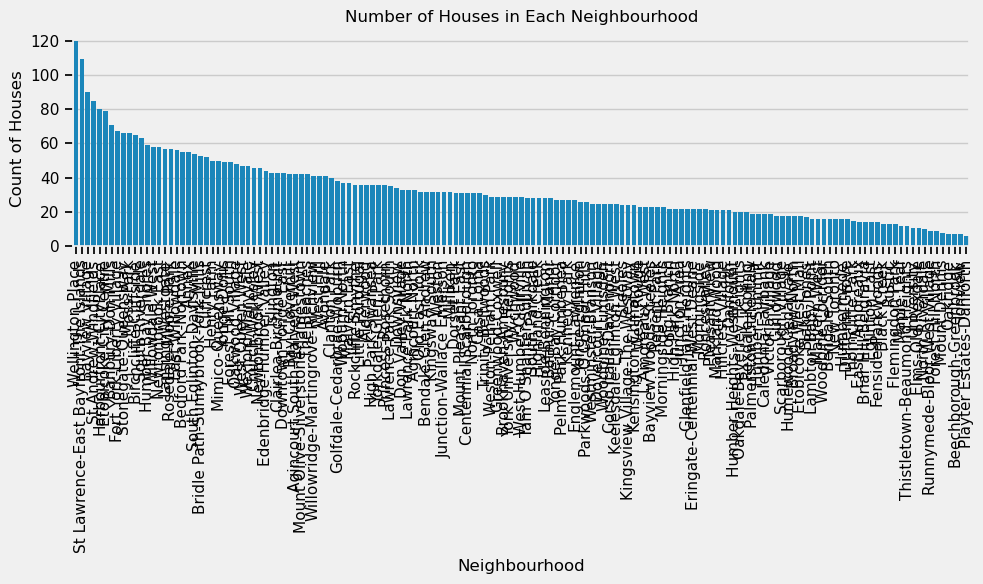

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
filtered_gdf = combined_gdf[combined_gdf['Neighbourhood'] != 'Outside City']
neighbourhood_counts = filtered_gdf['Neighbourhood'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values)

# Add labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Houses')
plt.title('Number of Houses in Each Neighbourhood')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
neighbourhoods = combined_gdf[['Neighbourhood', 'Type']].copy()
neighbourhoods = neighbourhoods.groupby(['Neighbourhood', 'Type']).size().reset_index(name='Count')

neighbourhoods

,Neighbourhood,Type,Count
0,Agincourt North,Condo Apt,8
1,Agincourt North,Condo Townhouse,3
2,Agincourt North,Detached,16
3,Agincourt South-Malvern West,Condo Apt,12
4,Agincourt South-Malvern West,Detached,18
...,...,...,...
458,York University Heights,Semi-Detached,3
459,Yorkdale-Glen Park,Condo Apt,4
460,Yorkdale-Glen Park,Condo Townhouse,4
461,Yorkdale-Glen Park,Detached,18


In [ ]:
neighbourhoods.to_csv("Hood_type_count.csv")

In [ ]:
link_hood_add = combined_gdf[['link','Neighbourhood', 'address']].copy()
link_hood_add = link_hood_add[link_hood_add['Neighbourhood'] != 'Outside City']

link_hood_add

,link,Neighbourhood,address
1,/on/etobicoke-real-estate/508-40-richview-rd/h...,Humber Heights-Westmount,"508 - 40 Richview Rd , Etobicoke - Humber Heights"
3,/on/etobicoke-real-estate/24-wallis-cres/home/...,Mount Olive-Silverstone-Jamestown,"24 Wallis Cres , Etobicoke - Mount Olive-Silve..."
7,/on/toronto-real-estate/2611-8-eglinton-ave-e/...,North Toronto,"2611 - 8 Eglinton Ave E , Toronto - Mount Plea..."
9,/on/etobicoke-real-estate/405-35-fontenay-crt/...,Edenbridge-Humber Valley,"405 - 35 Fontenay Crt , Etobicoke - Edenbridge..."
10,/on/toronto-real-estate/12-51-florence-st/home...,Little Portugal,"12 - 51 Florence St , Toronto - Little Portugal"
...,...,...,...
6769,NaN,Lambton Baby Point,47 Baby Point Crescent
6770,NaN,Bathurst Manor,180 Cocksfield Avenue
6771,NaN,Bridle Path-Sunnybrook-York Mills,45 Bayview Ridge Ridge
6772,NaN,Bridle Path-Sunnybrook-York Mills,38 Salonica Road


In [ ]:
link_hood_add.to_csv("link_hood_add.csv")